# XLNET Word Embeddings with NLU 

Computes contextualized word representations using combination of Autoregressive Language Model and Permutation Language Model

XlnetEmbeddings (XLNet): Generalized Autoregressive Pretraining for Language Understanding

XLNet is a new unsupervised language representation learning method based on a novel generalized permutation language modeling objective. Additionally, XLNet employs Transformer-XL as the backbone model, exhibiting excellent performance for language tasks involving long context. Overall, XLNet achieves state-of-the-art (SOTA) results on various downstream language tasks including question answering, natural language inference, sentiment analysis, and document ranking.

### Sources :
- https://arxiv.org/abs/1906.08237
- https://github.com/zihangdai/xlnet

### Paper abstract :

With the capability of modeling bidirectional contexts, denoising autoencoding based pretraining like BERT achieves better performance than pretraining approaches based on autoregressive language modeling. However, relying on corrupting the input with masks, BERT neglects dependency between the masked positions and suffers from a pretrain-finetune discrepancy. In light of these pros and cons, we propose XLNet, a generalized autoregressive pretraining method that (1) enables learning bidirectional contexts by maximizing the expected likelihood over all permutations of the factorization order and (2) overcomes the limitations of BERT thanks to its autoregressive formulation. Furthermore, XLNet integrates ideas from Transformer-XL, the state-of-the-art autoregressive model, into pretraining. Empirically, under comparable experiment settings, XLNet outperforms BERT on 20 tasks, often by a large margin, including question answering, natural language inference, sentiment analysis, and document ranking.


# 1. Install Java and NLU

In [1]:

import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install nlu  > /dev/null    




## 2. Load Model and lemmatize sample string

In [2]:
import nlu
pipe = nlu.load('xlnet')
pipe.predict('He was suprised by the diversity of NLU')

xlnet_base_cased download started this may take some time.
Approximate size to download 415.8 MB
[OK!]


,xlnet_embeddings,token
origin_index,,
0,"[-0.7367866039276123, -2.1186611652374268, -0....",He
0,"[-3.040233612060547, 0.35242974758148193, -0.0...",was
0,"[-0.11204412579536438, -1.0880558490753174, 1....",suprised
0,"[-1.7160815000534058, 0.05957664176821709, -0....",by
0,"[-0.8949756622314453, 0.2354469895362854, -0.4...",the
0,"[-0.96745765209198, -0.5944385528564453, 0.394...",diversity
0,"[-1.403516411781311, 0.3108177185058594, -0.32...",of
0,"[-0.25498849153518677, -2.2768502235412598, 1....",NLU


# 3. Download Sample dataset

In [3]:
import pandas as pd
# Download the dataset 
! wget -N https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv -P /tmp
# Load dataset to Pandas
df = pd.read_csv('/tmp/train-balanced-sarcasm.csv')
df

--2020-09-15 16:46:22--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.66.182
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.66.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255268960 (243M) [text/csv]
Saving to: ‘/tmp/train-balanced-sarcasm.csv’

train-balanced-sarc 100%[===================>] 243.44M  89.1MB/s    in 2.7s    

2020-09-15 16:46:25 (89.1 MB/s) - ‘/tmp/train-balanced-sarcasm.csv’ saved [255268960/255268960]



,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...


# 4. Visualize with T-Sne




Lets add Sentiment, Part Of Speech and Emotions to our pipeline because its so easy and so we can hue our T-SNE plots by POS and Sentiment       

In [4]:
pipe = nlu.load('pos sentiment xlnet emotion') # emotion
df['text'] = df['comment']

# We must set output level to token since NLU will infer a different output level for this pipeline composition
predictions = pipe.predict(df[['text','label']].iloc[0:500], output_level='token')
predictions

pos_anc download started this may take some time.
Approximate size to download 4.3 MB
[OK!]
analyze_sentiment download started this may take some time.
Approx size to download 4.9 MB
[OK!]
xlnet_base_cased download started this may take some time.
Approximate size to download 415.8 MB
[OK!]
classifierdl_use_emotion download started this may take some time.
Approximate size to download 20.7 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


,text,token,sentence_embeddings,pos,sentiment,sentiment_confidence,checked,category_confidence,category,xlnet_embeddings,label
origin_index,,,,,,,,,,,
0,NC and NH.,NC,"[[-0.06570463627576828, -0.03522053360939026, ...",NNP,negative,0.522900,NC,0.972704,surprise,"[0.6400730609893799, -0.27778854966163635, -0....",0
0,NC and NH.,and,"[[-0.06570463627576828, -0.03522053360939026, ...",CC,negative,0.522900,and,0.972704,surprise,"[0.7884323596954346, -1.5079097747802734, 0.67...",0
0,NC and NH.,NH,"[[-0.06570463627576828, -0.03522053360939026, ...",NNP,negative,0.522900,NH,0.972704,surprise,"[-0.2549888491630554, -2.2768502235412598, 1.1...",0
0,NC and NH.,.,"[[-0.06570463627576828, -0.03522053360939026, ...",.,negative,0.522900,.,0.972704,surprise,"[-0.8349902033805847, -0.4562772214412689, -0....",0
1,You do know west teams play against west teams...,You,"[[-0.0254225991666317, 0.05448468029499054, -0...",PRP,negative,0.473300,You,0.999838,fear,"[1.2179206609725952, -1.572461485862732, 0.313...",0
...,...,...,...,...,...,...,...,...,...,...,...
499,Hard drive requirements tend to include extra ...,for,"[[0.02939368598163128, -0.027575558051466942, ...",IN,positive,0.539600,for,0.991925,surprise,"[0.12577177584171295, -2.9093310832977295, -1....",0
499,Hard drive requirements tend to include extra ...,the,"[[0.02939368598163128, -0.027575558051466942, ...",DT,positive,0.539600,the,0.991925,surprise,"[-0.8949751853942871, 0.23544716835021973, -0....",0
499,Hard drive requirements tend to include extra ...,file,"[[0.02939368598163128, -0.027575558051466942, ...",NN,positive,0.539600,file,0.991925,surprise,"[-1.0581018924713135, -1.4315071105957031, 0.4...",0


## 4.1 Checkout sentiment distribution

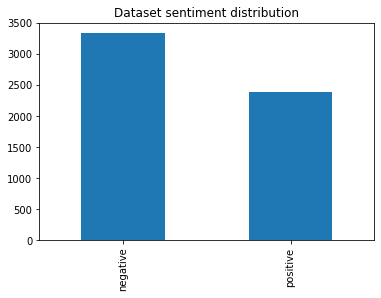

In [5]:
# Some Tokens are None which we must drop first
predictions.dropna(how='any', inplace=True)
# Some sentiment are 'na' which we must drop first
predictions = predictions[predictions.sentiment!= 'na']
predictions.sentiment.value_counts().plot.bar(title='Dataset sentiment distribution')

## 4.2 Checkout sentiment distribution

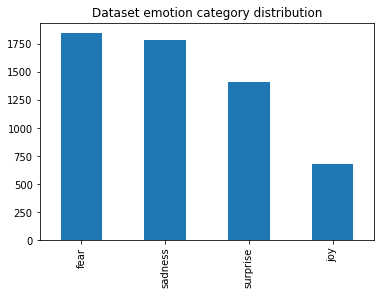

In [6]:
predictions.category.value_counts().plot.bar(title='Dataset emotion category distribution')

# 4.Prepare data for T-SNE algorithm.
We create a Matrix with one row per Embedding vector for T-SNE algorithm

In [7]:
import numpy as np

# We first create a column of type np array
predictions['np_array'] = predictions.xlnet_embeddings.apply(lambda x: np.array(x))
# Make a matrix from the vectors in the np_array column via list comprehension
mat = np.matrix([x for x in predictions.np_array])
mat.shape

(5720, 768)

## 4.1 Fit and transform T-SNE algorithm


In [8]:

from sklearn.manifold import TSNE
model = TSNE(n_components=2) #n_components means the lower dimension
low_dim_data = model.fit_transform(mat)
print('Lower dim data has shape',low_dim_data.shape)

Lower dim data has shape (5720, 2)


### Set plotting styles

In [9]:
# set some styles for for Plotting
import seaborn as sns
# Style Plots a bit
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1,rc={"lines.linewidth": 2.5})

%matplotlib inline
import matplotlib as plt
plt.rcParams['figure.figsize'] = (20, 14)


# 4.2 Plot low dimensional T-SNE ELMO embeddings with hue for POS


Text(0.5, 1.0, 'T-SNE ELMO Embeddings, colored by Part of Speech Tag')

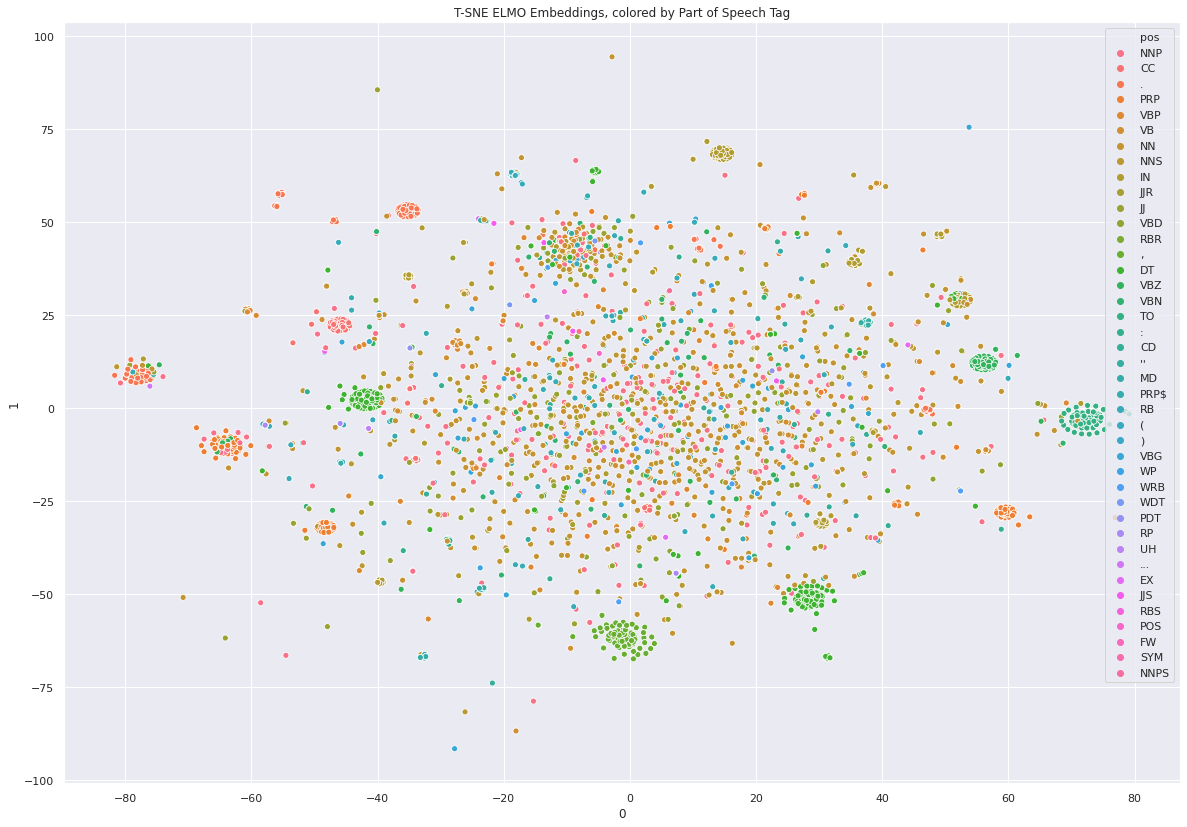

In [10]:
tsne_df =  pd.DataFrame(low_dim_data, predictions.pos)
ax = sns.scatterplot(data=tsne_df, x=0, y=1, hue=tsne_df.index)
ax.set_title('T-SNE ELMO Embeddings, colored by Part of Speech Tag')


## 4.3 Plot low dimensional T-SNE ELMO embeddings with hue for Sarcasm


Text(0.5, 1.0, 'T-SNE XLNET Embeddings, colored by Sarcasm label')

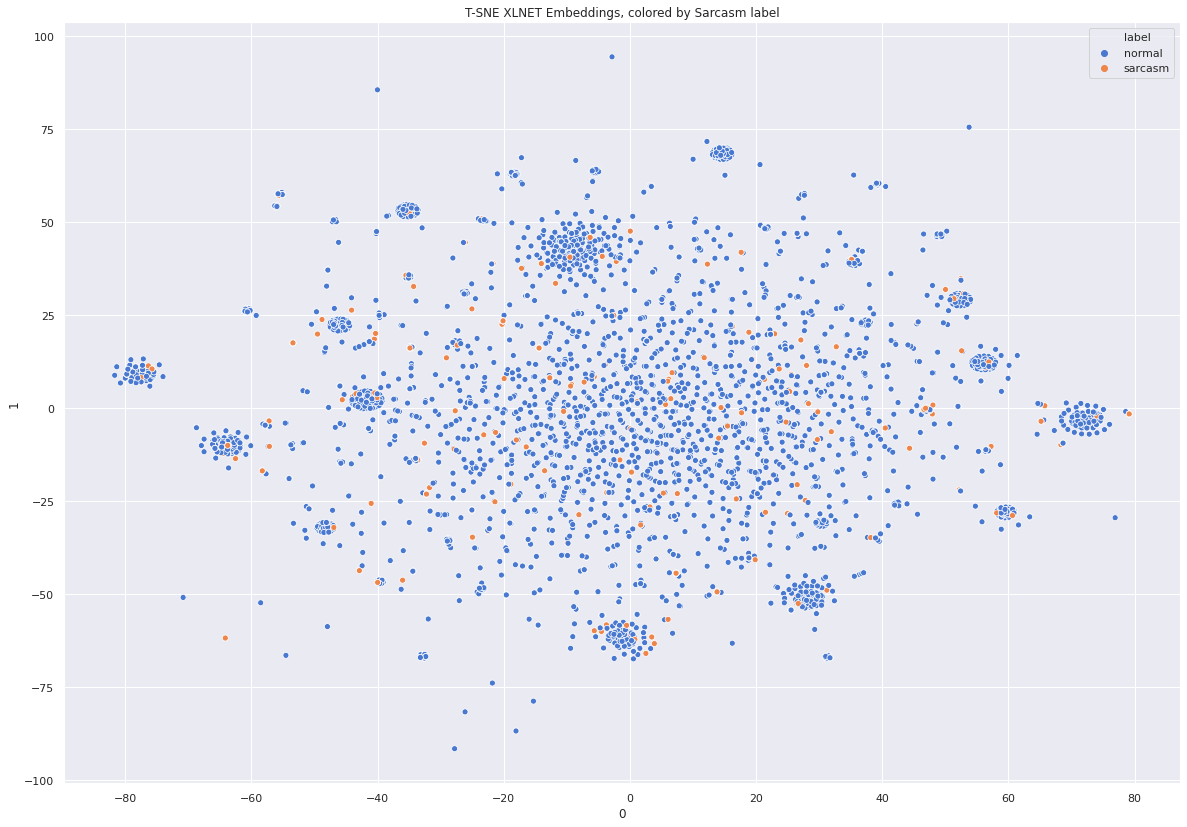

In [11]:
tsne_df =  pd.DataFrame(low_dim_data, predictions.label.replace({1:'sarcasm',0:'normal'}))
ax = sns.scatterplot(data=tsne_df, x=0, y=1, hue=tsne_df.index)
ax.set_title('T-SNE XLNET Embeddings, colored by Sarcasm label')


## 4.4 Plot low dimensional T-SNE ELMO embeddings with hue for Sentiment


Text(0.5, 1.0, 'T-SNE XLNET Embeddings, colored by Sentiment')

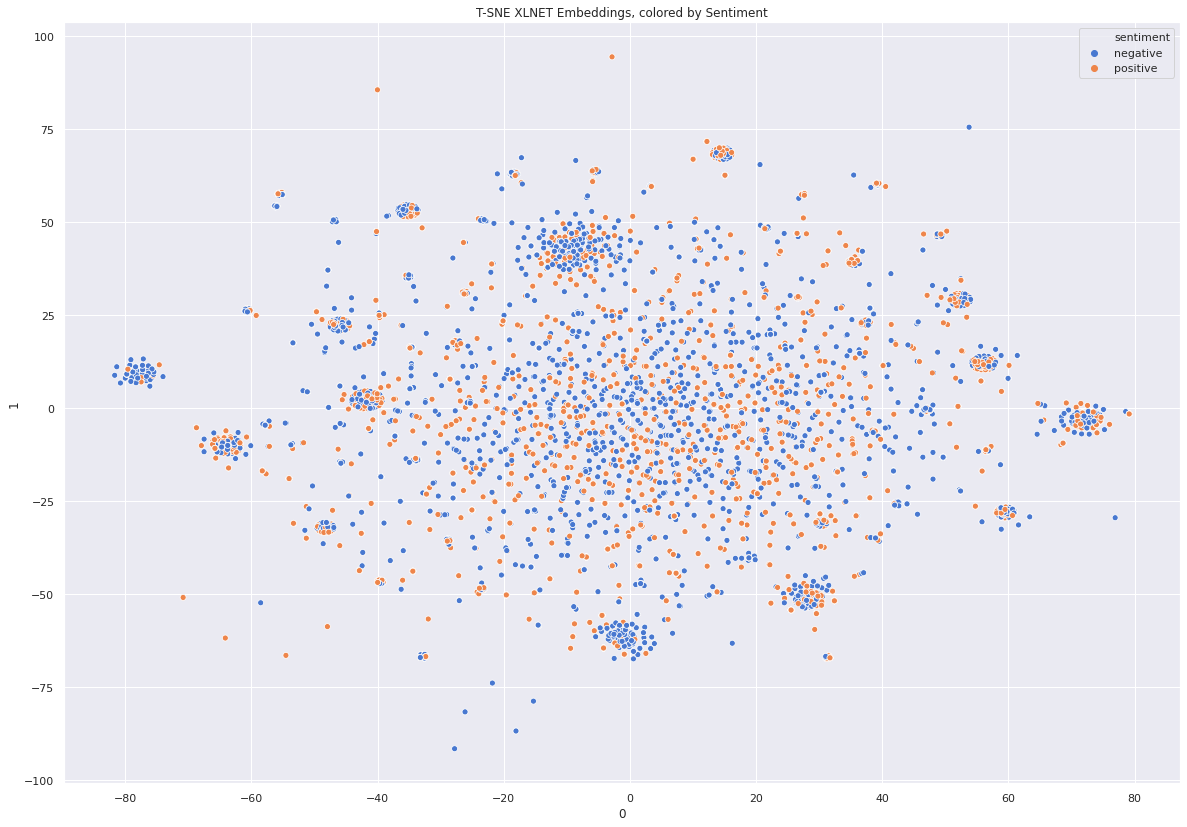

In [12]:
tsne_df =  pd.DataFrame(low_dim_data, predictions.sentiment)
ax =  sns.scatterplot(data=tsne_df, x=0, y=1, hue=tsne_df.index)
ax.set_title('T-SNE XLNET Embeddings, colored by Sentiment')


# 5.5 Plot low dimensional T-SNE ELMO embeddings with hue for Emotions


Text(0.5, 1.0, 'T-SNE XLNET Embeddings, colored by Emotion')

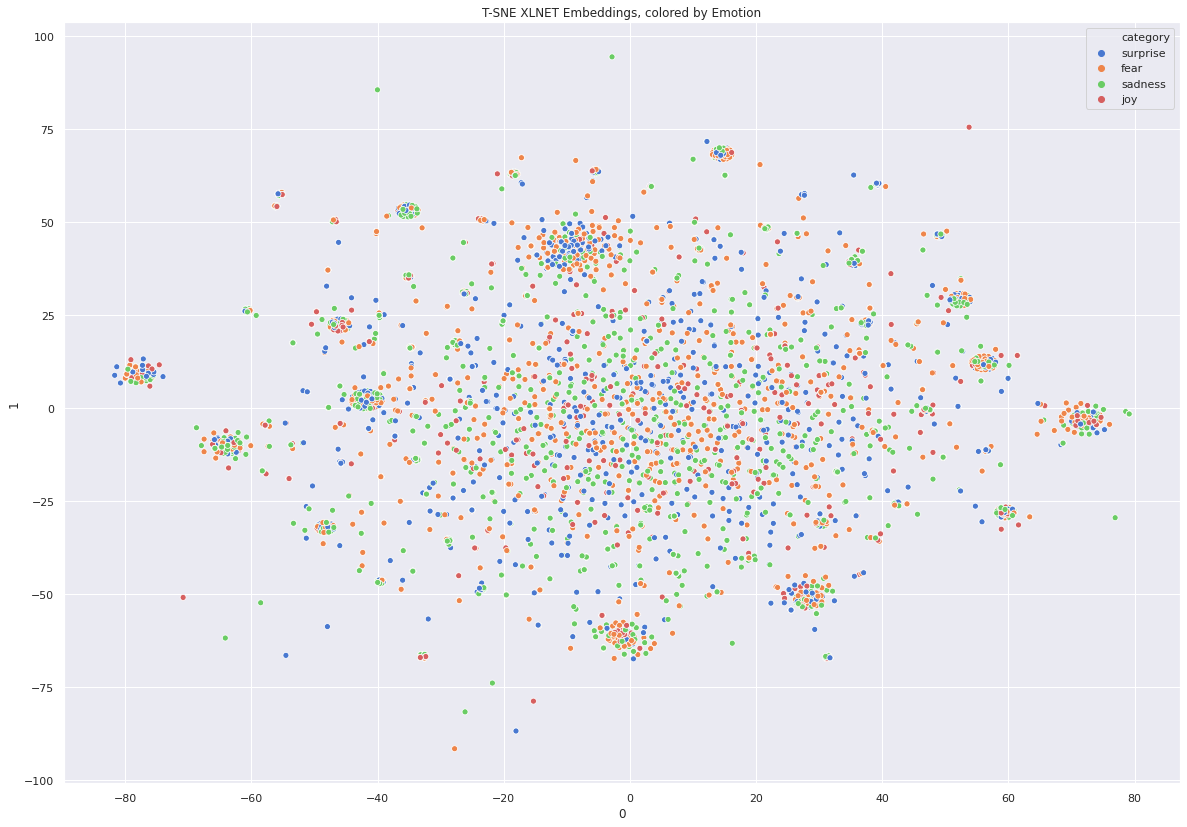

In [13]:
tsne_df =  pd.DataFrame(low_dim_data, predictions.category)
ax =  sns.scatterplot(data=tsne_df, x=0, y=1, hue=tsne_df.index)
ax.set_title('T-SNE XLNET Embeddings, colored by Emotion')


# 6. NLU has many more embedding models!      
Make sure to try them all out!       
You can change 'xlnet' in nlu.load('xlnet') to bert, xlnet, albert or any other of the **100+ word embeddings** offerd by NLU

In [14]:
nlu.print_all_model_kinds_for_action('embed')

For language <en> NLU provides the following Models : 
nlu.load('en.embed') returns Spark NLP model glove_100d
nlu.load('en.embed.glove') returns Spark NLP model glove_100d
nlu.load('en.embed.glove.100d') returns Spark NLP model glove_100d
nlu.load('en.embed.bert') returns Spark NLP model bert_base_uncased
nlu.load('en.embed.bert.base_uncased') returns Spark NLP model bert_base_uncased
nlu.load('en.embed.bert.base_cased') returns Spark NLP model bert_base_cased
nlu.load('en.embed.bert.large_uncased') returns Spark NLP model bert_large_uncased
nlu.load('en.embed.bert.large_cased') returns Spark NLP model bert_large_cased
nlu.load('en.embed.biobert') returns Spark NLP model biobert_pubmed_base_cased
nlu.load('en.embed.biobert.pubmed_base_cased') returns Spark NLP model biobert_pubmed_base_cased
nlu.load('en.embed.biobert.pubmed_large_cased') returns Spark NLP model biobert_pubmed_large_cased
nlu.load('en.embed.biobert.pmc_base_cased') returns Spark NLP model biobert_pmc_base_cased
nlu.lo